In [1]:
%matplotlib inline

In [2]:
from scipy.stats import logistic
import numpy as np
import matplotlib.pyplot as plt

from aptos.model import rolloff, sin_decay

## Warmup / Rolloff

In [10]:
length = 50
loc_factor = 0.5
scale_factor = 0.1
magnitude = 1

In [11]:
lrs = rolloff(length, loc_factor, scale_factor, magnitude)
lrs

array([0.99330715, 0.99183743, 0.9900482 , 0.98787157, 0.98522597,
       0.98201379, 0.97811873, 0.97340301, 0.96770454, 0.96083428,
       0.95257413, 0.94267582, 0.93086158, 0.9168273 , 0.90024951,
       0.88079708, 0.85814894, 0.83201839, 0.80218389, 0.76852478,
       0.73105858, 0.68997448, 0.64565631, 0.59868766, 0.549834  ,
       0.5       , 0.450166  , 0.40131234, 0.35434369, 0.31002552,
       0.26894142, 0.23147522, 0.19781611, 0.16798161, 0.14185106,
       0.11920292, 0.09975049, 0.0831727 , 0.06913842, 0.05732418,
       0.04742587, 0.03916572, 0.03229546, 0.02659699, 0.02188127,
       0.01798621, 0.01477403, 0.01212843, 0.0099518 , 0.00816257])

Text(0.5, 1.0, 'Learning Rate')

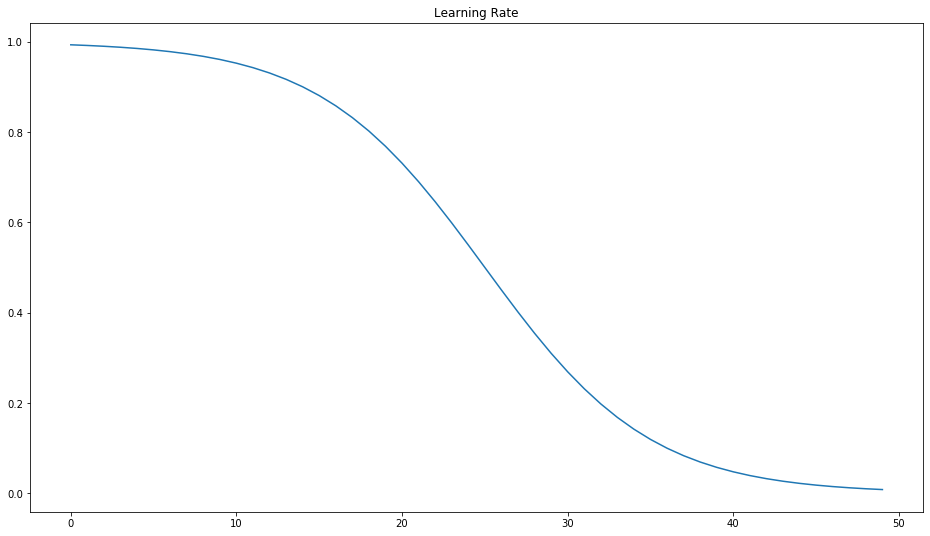

In [12]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(lrs)
ax.set_title('Learning Rate')

## Decaying sinusoid

In [7]:
offset = 0.5
amplitude = 3
n_periods = 3.75
n_epochs = 100
gamma = 0.97

In [8]:
sin = sin_decay(offset, amplitude, n_periods, n_epochs, gamma)

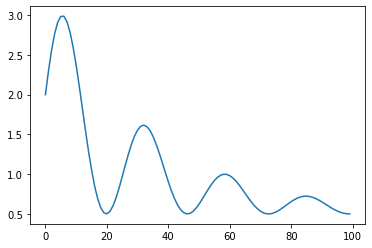

In [9]:
plt.plot(sin)

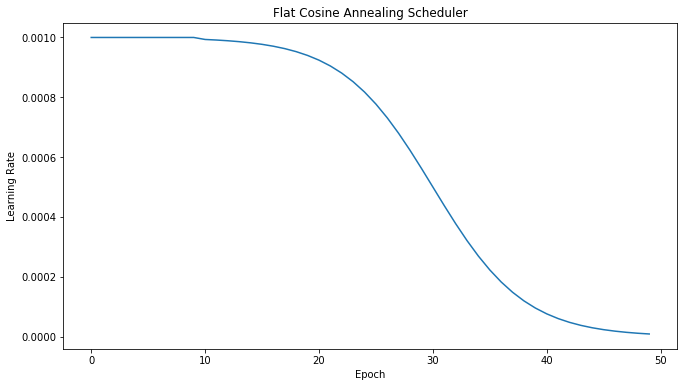

In [37]:
 def get_lrs(start_lr, start_anneal, n_epochs):
        # constant LR to start
        lrs = np.zeros((n_epochs,))
        lrs[0:start_anneal] = start_lr

        # setup rolloff params
        length = n_epochs - start_anneal

        # rolloff to zero
        rolloff_lrs = rolloff(length, loc_factor=0.5, scale_factor=0.1, magnitude=start_lr)
        lrs[start_anneal:] = rolloff_lrs
        return lrs
    
lrs = get_lrs(0.001, 10, 50)

fig, ax = plt.subplots(figsize=(11, 6))

ax.plot(lrs)
ax.set_title('Flat Cosine Annealing Scheduler')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.savefig('../resources/flat-cosine-annealing-scheduler.png')

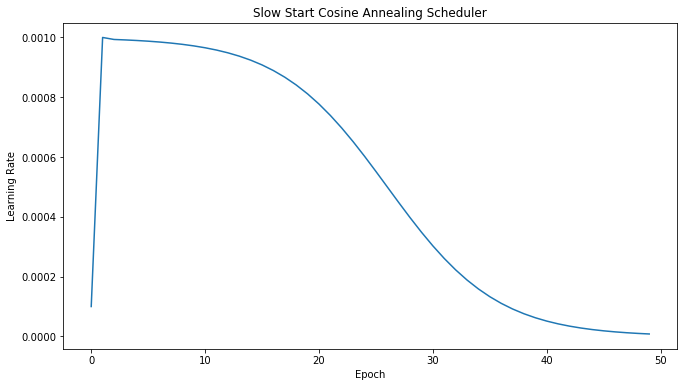

In [36]:
 def get_lrs(start_lr, start_anneal, n_epochs):
        # constant LR to start
        lrs = np.zeros((n_epochs,))
        lrs[0:start_anneal] = np.linspace(start_lr / 10, start_lr, start_anneal)

        # setup rolloff params
        length = n_epochs - start_anneal

        # rolloff to zero
        rolloff_lrs = rolloff(length, loc_factor=0.5, scale_factor=0.1, magnitude=start_lr)
        lrs[start_anneal:] = rolloff_lrs
        return lrs
    
lrs = get_lrs(0.001, 2, 50)

fig, ax = plt.subplots(figsize=(11, 6))

ax.plot(lrs)
ax.set_title('Slow Start Cosine Annealing Scheduler')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.savefig('../resources/slow-start-cosine-annealing-scheduler.png')

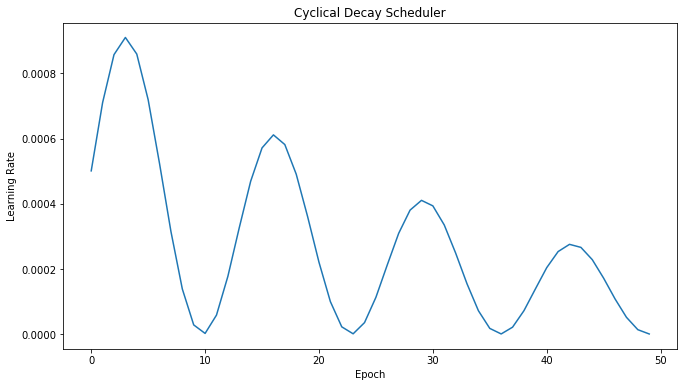

In [35]:
offset = 0.000001
amplitude = 0.001
n_periods = 3.75
n_epochs = 50
gamma = 0.97
lrs = sin_decay(offset, amplitude, n_periods, n_epochs, gamma)

fig, ax = plt.subplots(figsize=(11, 6))

ax.plot(lrs)
ax.set_title('Cyclical Decay Scheduler')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.savefig('../resources/cyclical-decay-scheduler.png')